## The following securities are included in the Markowitz Portfolio Optimization:
#### XLK, XLF, XLV, XLY, XLP, XLE, XLU, XLI, VNQ

In [1]:
import os
import pickle
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from scipy.optimize import minimize
import math
etfs = ['XLK','XLF', 'XLV', 'XLY', 'XLP', 'XLE', 'XLU', 'XLI', 'VNQ']

## Collect security data from yfinance for a period of **10 Years**
##### *this is only done if data is not already pickled*
> You may refresh the data by deleting the security_data.pkl file

In [2]:


security_data = None
if 'security_data.pkl' not in os.listdir():
    security_data = {etf: yf.Ticker(etf).history(period='max') for etf in etfs}
    pickle.dump(security_data, open('security_data.pkl', 'wb+'))
else:
    security_data = pickle.load(open('security_data.pkl', 'rb'))
for etf in security_data:
    security_data[etf] = security_data[etf].tail(4000)

In [3]:
temp_returns_dict = {etf: pd.DataFrame(security_data[etf]['Close']) for etf in security_data}
for etf in temp_returns_dict:
    temp_returns_dict[etf] = temp_returns_dict[etf] / temp_returns_dict[etf].shift(1) - 1
    temp_returns_dict[etf] = temp_returns_dict[etf].bfill()
    temp_returns_dict[etf].columns = [etf]

return_df = pd.concat(list(temp_returns_dict.values()), axis=1)
return_df

,XLK,XLF,XLV,XLY,XLP,XLE,XLU,XLI,VNQ
Date,,,,,,,,,
2009-01-16 00:00:00-05:00,-0.040830,-0.165289,-0.024175,-0.058709,-0.011765,-0.053288,-0.017301,-0.046288,-0.111929
2009-01-20 00:00:00-05:00,-0.040830,-0.165289,-0.024175,-0.058709,-0.011765,-0.053288,-0.017301,-0.046288,-0.111929
2009-01-21 00:00:00-05:00,0.048151,0.147277,0.021235,0.030413,0.004851,0.067181,0.011268,0.025469,0.104627
2009-01-22 00:00:00-05:00,-0.022637,-0.061489,0.004236,-0.012506,-0.000878,-0.027435,-0.000348,-0.003280,-0.054704
2009-01-23 00:00:00-05:00,0.014305,0.033333,0.000000,-0.003040,-0.009662,0.029084,0.002090,-0.030089,0.030423
...,...,...,...,...,...,...,...,...,...
2024-12-02 00:00:00-05:00,0.009498,-0.009934,-0.001764,0.008727,-0.001202,-0.010573,-0.021464,-0.007362,-0.014568
2024-12-03 00:00:00-05:00,0.003602,-0.007476,-0.002243,-0.000758,-0.005173,-0.000106,-0.008626,-0.006297,-0.005066
2024-12-04 00:00:00-05:00,0.018285,-0.003766,-0.000545,0.009283,-0.002782,-0.024124,-0.000124,0.004365,-0.002702


# Plot Returns

Text(0, 0.5, 'Return')

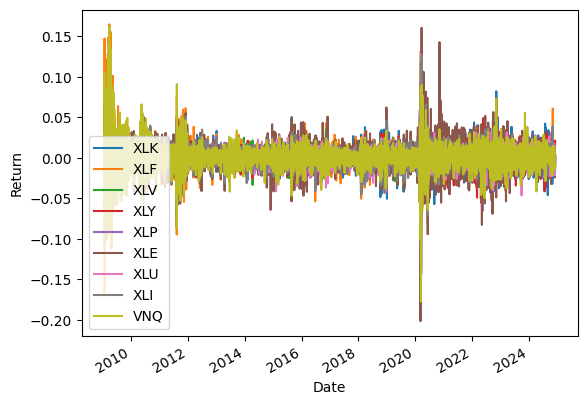

In [4]:
colors=plt.cm.plasma(np.linspace(0,3,20))
ax = return_df.plot()
ax.set_xlabel('Date')
ax.set_ylabel('Return')


# Cummulative Returns

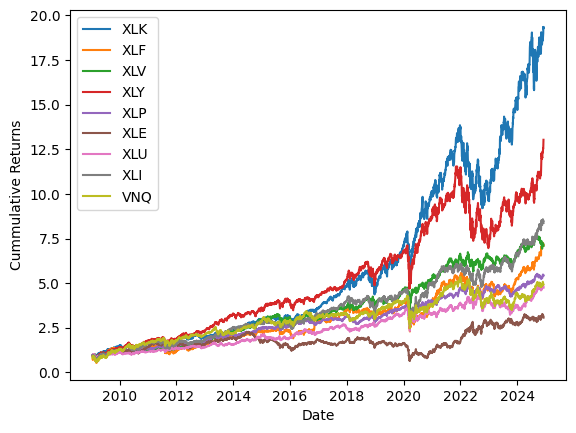

In [5]:
for etf in return_df:
    plt.plot((return_df[etf]+1).cumprod(), label=etf)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Cummulative Returns')
plt.show()

In [6]:
def generate_random_weight_vector(n):
    w = np.asmatrix(np.random.rand(n)).T
    return w / w.sum()

In [7]:
cov = np.matrix(return_df.cov())
R = np.matrix(return_df.mean()).T

def eval_random_portfolio():
    w = generate_random_weight_vector(return_df.shape[1])
    mu = w.T * R
    sigma = np.sqrt(w.T * cov * w)
    return mu.item(0), sigma.item(0)

In [8]:
mus = []
sigmas = []

for i in range(5000000):
    mu, sigma = eval_random_portfolio()
    mus.append(mu)
    sigmas.append(sigma)


Text(0, 0.5, 'Expected Return')

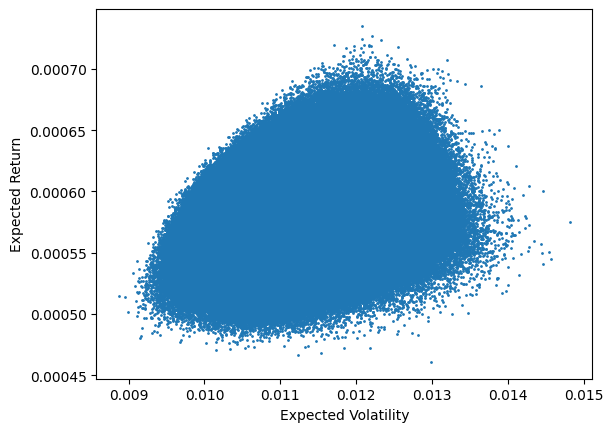

In [9]:
plt.plot(sigmas, mus, 'o', markersize=1)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [10]:
cov = np.matrix(return_df.cov()) # Covariance matrix of all ETFs included in this study (np matrix format)

def weight_list_as_matrix(w_list):
    return np.asmatrix(w_list).T

def expected_portfolio_return(w_list): 
    w = weight_list_as_matrix(w_list) # w is a column vector of weights (np matrix format)
    mu = np.asmatrix(return_df.mean()).T # this is a column vector of mean returns
    return mu.T * w

def negated_expected_portfolio_return(w_list):
    return -1 * expected_portfolio_return(w_list)

def expected_portfolio_volatility(w_list):
    w = weight_list_as_matrix(w_list) # w is a column vector of weights (np matrix format)
    return (w.T * cov * w).item(0)

def weights_constraint(w_list):
    w = weight_list_as_matrix(w_list) # w is a column vector of weights (np matrix format)
    return (np.asmatrix(np.ones(w.shape[0])) * w).item(0) - 1
    '''
    if math.isclose( (np.asmatrix(np.ones(w.shape[0])) * w).item(0), 1): # we want to count 0.99999999 as 1 so we use math.isclose
        return 0 # if its close, we return 0 (this is a positive signal for the minimizer)
    else:
        return -1 # if its not close, we return -1 (anything BUT 0 is a negative signal)
    '''
def variance_constraint(w_list, gamma):
    w = weight_list_as_matrix(w_list) # w is a column vector of weights (np matrix format)
    return gamma ** 2 - (w.T * cov * w).item(0)  # gamma - cov must be non-negative, i.e., gamme > cov


def get_frontier():
    
    x0 = [1/len(return_df) for etf in return_df]
    bounds = [(0,1) for etf in return_df]
    options = {
        'maxiter': 100,
        'ftol': 1e-10
    }
    
    frontier_data = []
    for gamma in np.arange(0.0085, 0.014, 0.0001):
        constraints = [{'type': 'eq', 'fun': weights_constraint}, {'type': 'ineq', 'fun': variance_constraint, 'args': (gamma,)}]
        optimal_weights = scipy.optimize.minimize(negated_expected_portfolio_return, x0, bounds=bounds, constraints=constraints, options=options)
        if optimal_weights['success'] == True:
            frontier_data.append( (-optimal_weights['fun'], optimal_weights['x']) ) # tuple of expected returns and optimal weights
    return frontier_data

#get_frontier()

In [11]:
data = get_frontier()

In [12]:
e_r = [_[0] for _ in data]
e_v = [math.sqrt(expected_portfolio_volatility(_[1])) for _ in data]

C:\Users\Edwar\.virtualenvs\CS-4111-Project1\MATH 2015 Capstone Project\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Edwar\.virtualenvs\CS-4111-Project1\MATH 2015 Capstone Project\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


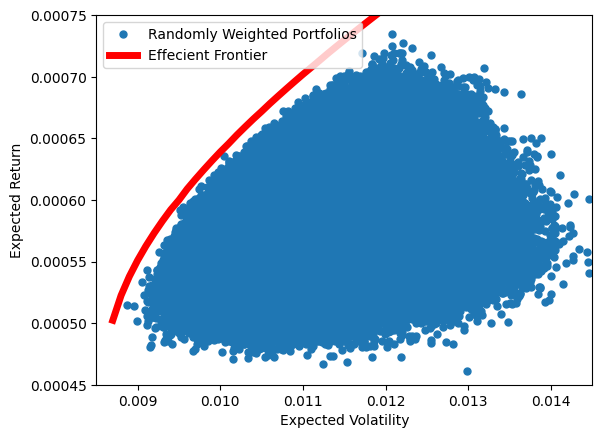

In [13]:
plt.plot(sigmas, mus, 'o', markersize=5, label='Randomly Weighted Portfolios')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

plt.plot(e_v, e_r, linewidth=5, color='red', label='Effecient Frontier')
plt.xlim(0.009-0.0005,0.014+0.0005)
plt.ylim(0.0005-0.00005, 0.0007+0.00005)
plt.legend()